<a href="https://colab.research.google.com/github/rizalanhari/PCVK_Genap_2021/blob/main/car_park_line_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import math
from google.colab.patches import cv2_imshow

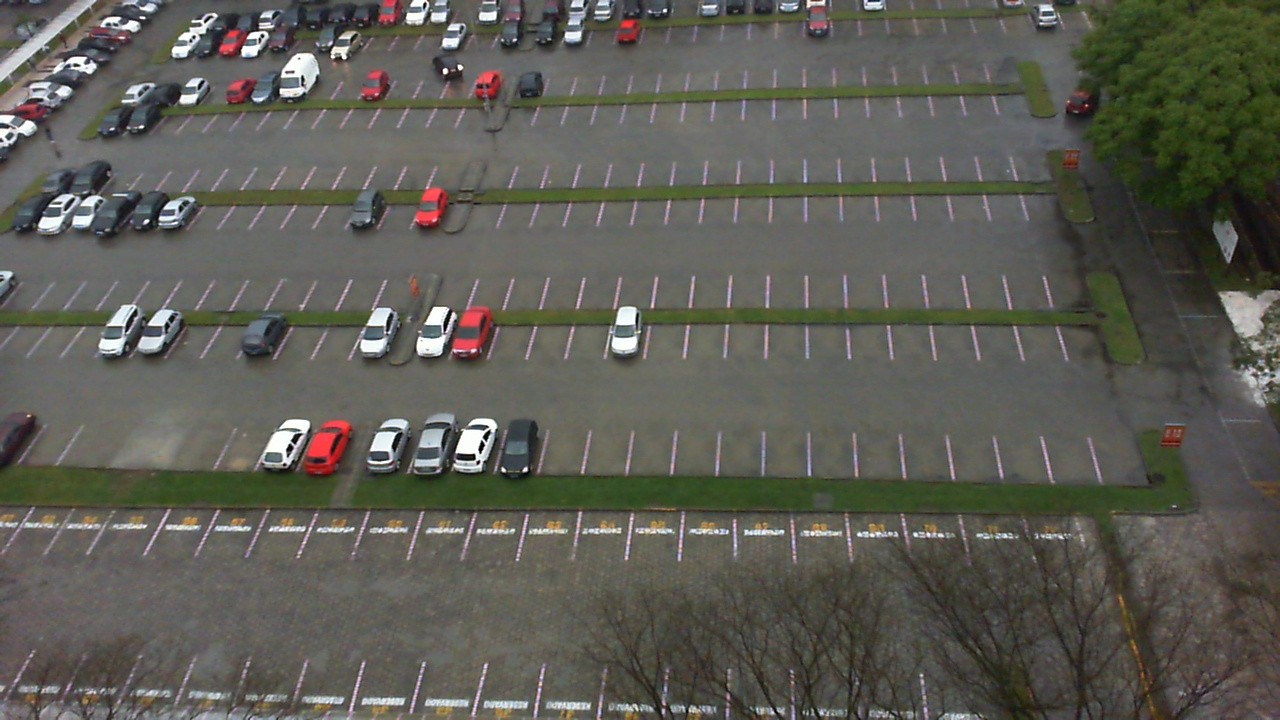

In [22]:
parking_lot = cv2.imread('/content/drive/MyDrive/PCVK Project/Car Park/2012-09-21_07_20_13.jpg')
cv2_imshow(parking_lot)

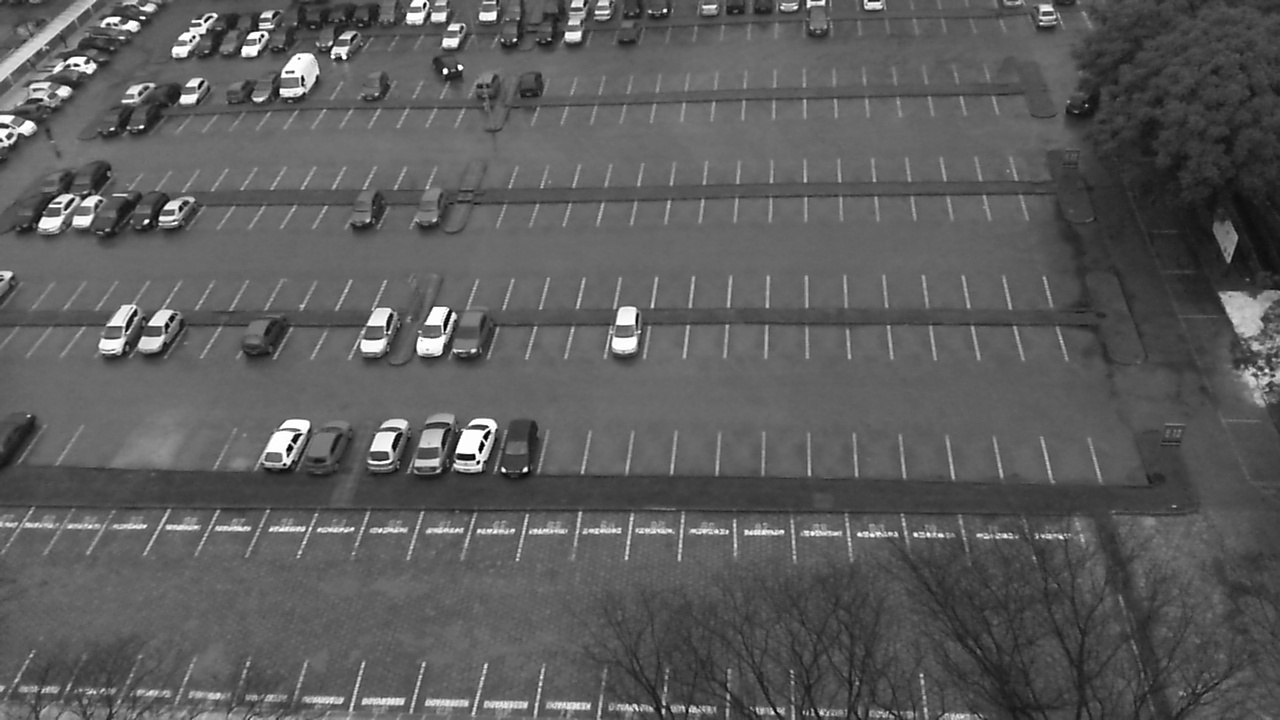

In [17]:
gray = cv2.cvtColor(src=parking_lot, code=cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

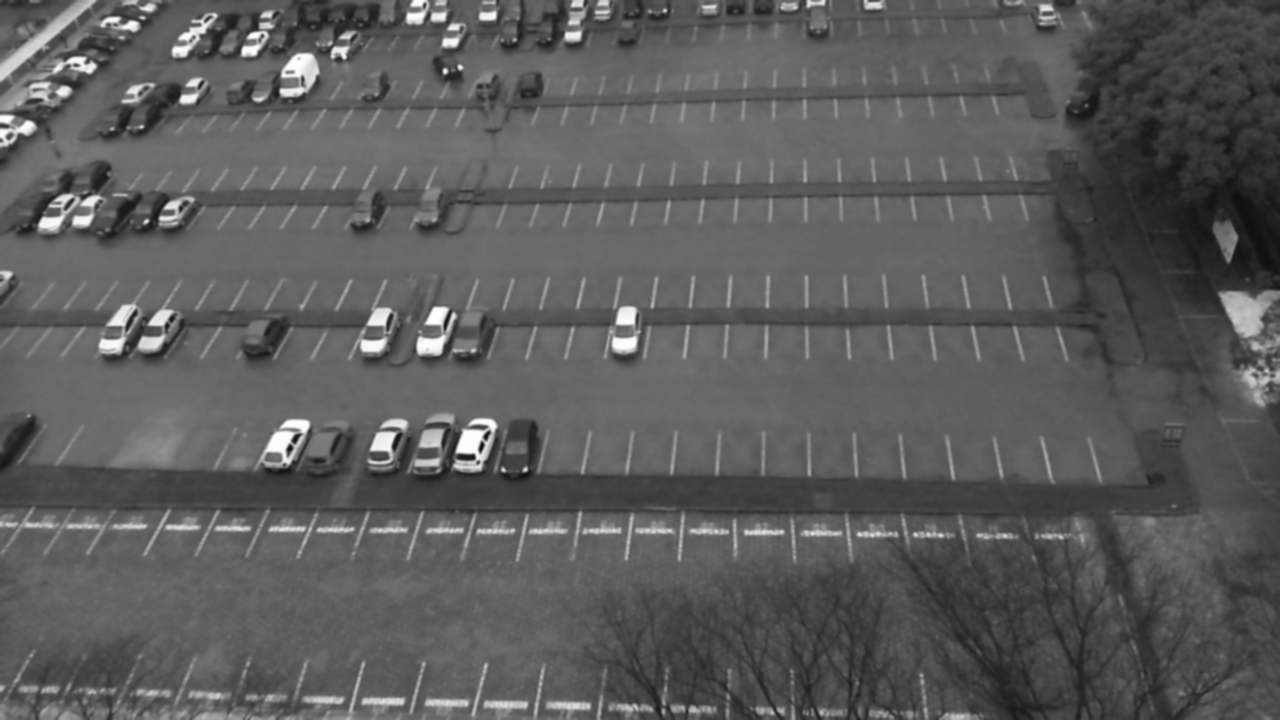

In [18]:
blur_gray = cv2.GaussianBlur(src=gray, ksize=(5, 5), sigmaX=0)
cv2_imshow(blur_gray)

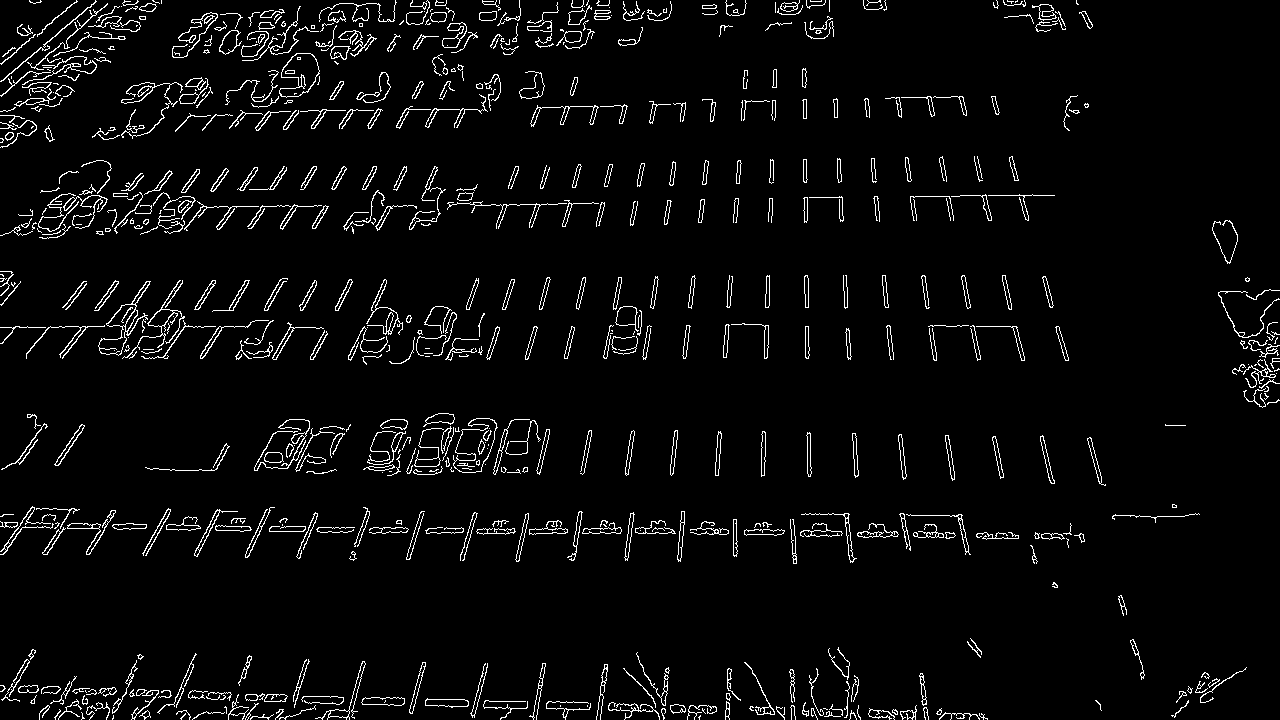

In [19]:
edges = cv2.Canny(blur_gray, 50, 150, 3)
cv2_imshow(edges)

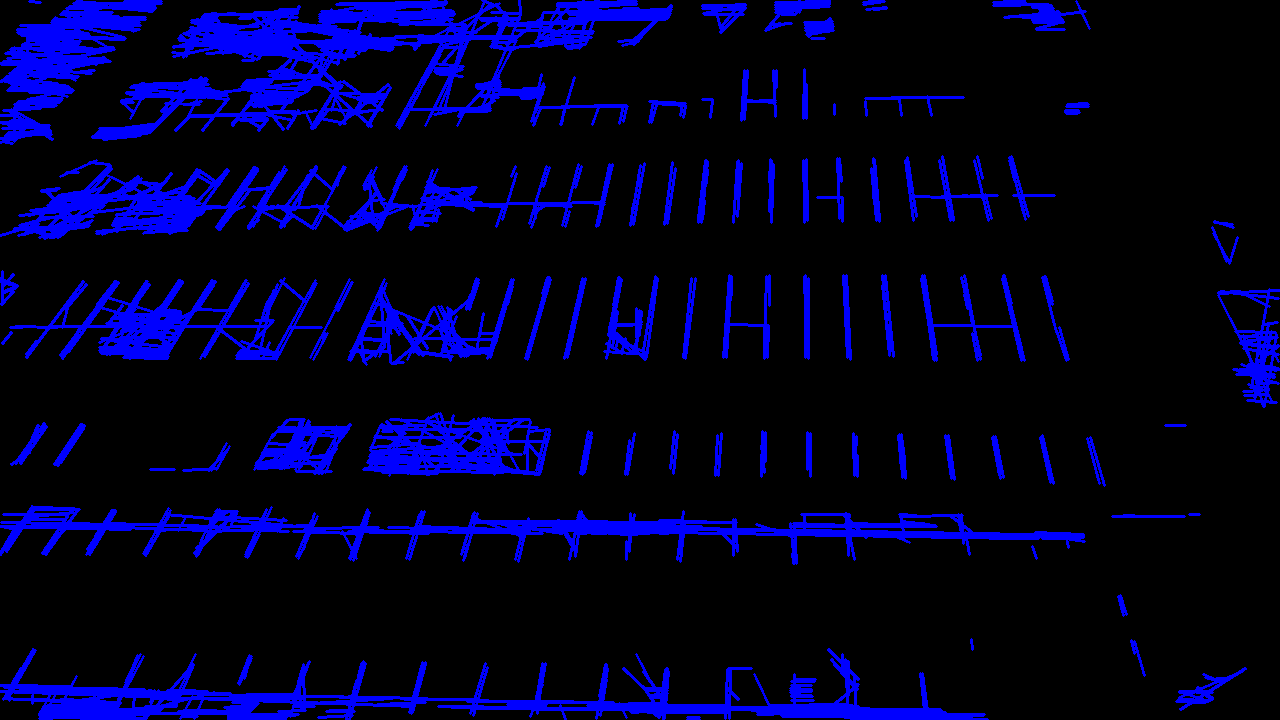

In [20]:
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 20  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 10  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(parking_lot) * 0  # creating a blank to draw lines on

lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
      cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),2)

cv2_imshow(line_image)